# Training a model with DiscoEPG

In DiscoEPG, we provide *trainer* objects that allow the users to train a ML model with their custom dataset, namely `EPGSegment` and `EPGSegmentML`. While `EPGSegment` supports training deep learning models such as `1DCNN`, `2DCNN` or `ResNet`, `EPGSegmentML` supports `scikit-learn` traditional ML models, i.e., `XGB`, `Random Forest` and `Logistic Regression`. \
We suggest the users to use `CNN1D` with raw input or `XGB` with wavelet transform features for initial experiments thanks to their rapid training speed and competitive predicition accuracy.

In [1]:
# Autoreload utilities
%load_ext autoreload
%autoreload 2

In [2]:
# Importing trainer objects
from DiscoEPG import EPGSegment
from DiscoEPG import EPGSegmentML

In [3]:
import DiscoEPG
DiscoEPG.__version__

'0.0.15'

## DiscoEPG
Support 1DCNN, ResNet, 2DCNN

## Training and evaluation

Each trainer will get the model settings from a config file (.json), which has to be preprocessed to a Python dictionary

In [4]:
config_file = 'C:\\Dung\\EPG_project\\ML4Insects\\configs\\cnn1d.twentyfour.raw.256.json'# Define the path to your config file
# Model configurations
from DiscoEPG.utils import process_config
config = process_config(config_file)
config 
# You can create/adjust the *.json configuration files in the configs folder "./DiscoEPG/configs/your_config_files.json"

{'exp_name': 'awdawdawdw',
 'dataset_name': 'twentyfour',
 'window_size': 1024,
 'hop_length': 1024,
 'arch': 'cnn1d',
 'method': 'raw',
 'scale': True,
 'outlier_filter': False,
 'optimizer': 'Adam',
 'n_epochs': 50,
 'lr': 0.0001,
 'batch_size': 256,
 'scope': 1,
 'root_dir': 'C:\\Dung\\EPG_project\\ML4Insects',
 'data_path': 'C:\\Dung\\EPG_project\\data',
 'device': 'cuda',
 'timestamp': '2024-09-17 09:42:13'}

In [5]:
# Call the trainer
epgs = EPGSegment(config)

Training mode.
Loading data ...


twentyfour: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Done! Elapsed: 2.5115171000361443 s


In [6]:
# Train
epgs.train(early_stop=False)

Obtaining dataloders ...
Generating sliding windows ...


100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


Total: 1 recordings
Signal processing method: raw | Scale: True
Class distribution (label:ratio): 1: 0.09, 2: 0.05, 4: 0.03, 5: 0.78, 6: 0.01, 8: 0.04
Labels map (from:to): {1: 0, 2: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}
Train, validate, test set sizes: (5661, 2265, 881)
Input shape: (256, 1, 1024)
Training...


Training:   2%|▏         | 1/50 [00:00<00:36,  1.35it/s]

Epoch [1/50] | Train loss: 1.2630 | Val. loss: 1.1706 | Train acc: 0.6697 | Val. acc: 0.7912


Training:  22%|██▏       | 11/50 [00:04<00:14,  2.67it/s]

Epoch [11/50] | Train loss: 0.0911 | Val. loss: 0.1150 | Train acc: 0.9666 | Val. acc: 0.9589


Training:  42%|████▏     | 21/50 [00:08<00:10,  2.77it/s]

Epoch [21/50] | Train loss: 0.0527 | Val. loss: 0.0789 | Train acc: 0.9820 | Val. acc: 0.9735


Training:  62%|██████▏   | 31/50 [00:11<00:06,  2.75it/s]

Epoch [31/50] | Train loss: 0.0507 | Val. loss: 0.0751 | Train acc: 0.9841 | Val. acc: 0.9770


Training:  82%|████████▏ | 41/50 [00:15<00:03,  2.73it/s]

Epoch [41/50] | Train loss: 0.0288 | Val. loss: 0.0680 | Train acc: 0.9915 | Val. acc: 0.9806


Training: 100%|██████████| 50/50 [00:18<00:00,  2.67it/s]

Epoch [50/50] | Train loss: 0.0198 | Val. loss: 0.0574 | Train acc: 0.9943 | Val. acc: 0.9823
Finished training!


The performance of a ML models is performed based on:
+ Task 1: Waveform classification - Accuracy and f1 scores
+ Task 2: Waveform segmentation - Overlap rate

In [7]:
# Task 1 evaluation
epgs.evaluate('test')

Accuracy: 98.75, Average f1: 94.8
Class accuracy: {'NP': 100.0, 'C': 84.09, 'E1': 100.0, 'E2': 99.71, 'F': 100.0, 'pd': 94.59}
Finished testing!


In [8]:
# Task 2 evaluation 
import os 
import numpy as np 

model_overlap_rate = []
all_test_rec = os.listdir(f'C:/Dung/EPG_project/data/twentyfour_ANA') # replace the argument with the path to your testing directory
all_test_rec = [x[:-4] for x in all_test_rec]
for test_rec in all_test_rec:
    epgs.segment(test_rec)
    print(f'{test_rec} - Overlap rate: {epgs.overlap_rate}')
    model_overlap_rate.append(epgs.overlap_rate)
print('Done. Mean overlap rate: {}'.format(np.mean(model_overlap_rate)))

File name: twentyfour_twenty_four_LD-LL_16_8_0zt-ch3
twentyfour_twenty_four_LD-LL_16_8_0zt-ch3 - Overlap rate: 98.72
Done. Mean overlap rate: 98.72


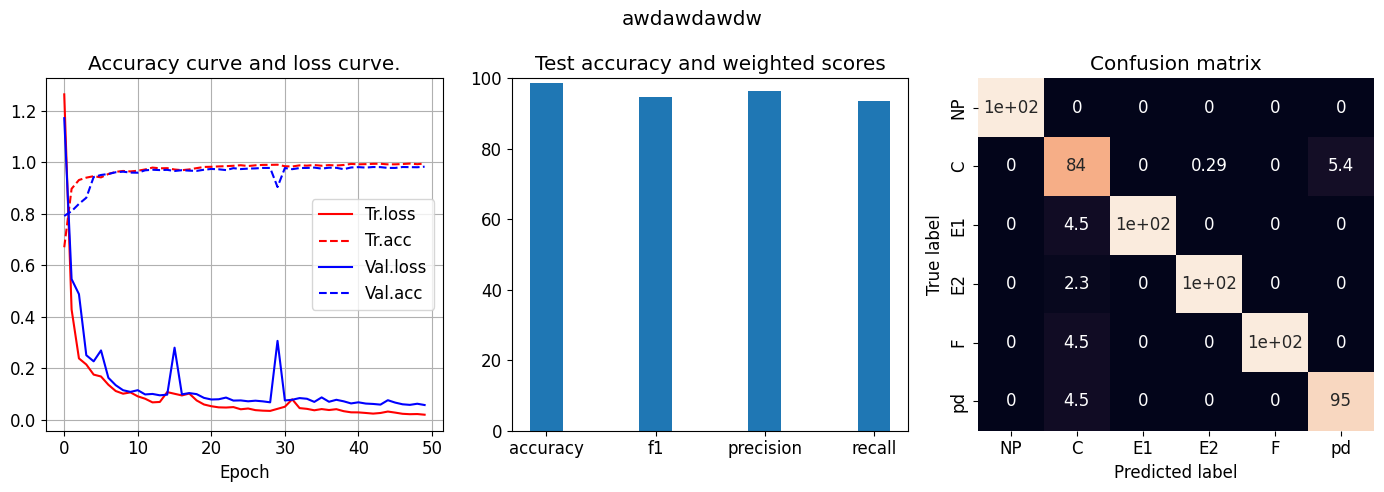

In [9]:
# We can plot the training/validation curves and task 1 results
epgs.plot_train_result()

In [10]:
# Write training log 
epgs.write_train_log(save_dir = '')

Log written to C:\Dung\EPG_project\ML4Insects/log/cnn1d/session_result.csv and C:\Dung\EPG_project\ML4Insects/log/cnn1d/session_log.txt.


In [11]:
# Save checkpoint
epgs.save_checkpoint(name = 'cnn1d.twentyfour.pt', save_dir = f'{config.root_dir}/checkpoints')

Parameters saved to C:\Dung\EPG_project\ML4Insects/checkpoints/cnn1d.twentyfour.pt.


In [12]:
# Training logs and  checkpoints are written and saved directly into the folder log (created automatically) inside your working directory
# For example 
# working_dir 
# |---- data (the dataf older)
# |---- config 
# |---- log (automatically created)
# |---- checkpoints (automatically created)

## Load a pretrained model

In [13]:
# You will have to load the configuration again
config_file = 'C:\\Dung\\EPG_project\\ML4Insects\\configs\\cnn1d.twentyfour.raw.256.json'# Define the path to your config file
# Model configurations
from DiscoEPG.utils import process_config
config = process_config(config_file)
config 
# You can create/adjust the *.json configuration files in the configs folder "./DiscoEPG/configs/your_config_files.json"

{'exp_name': 'awdawdawdw',
 'dataset_name': 'twentyfour',
 'window_size': 1024,
 'hop_length': 1024,
 'arch': 'cnn1d',
 'method': 'raw',
 'scale': True,
 'outlier_filter': False,
 'optimizer': 'Adam',
 'n_epochs': 50,
 'lr': 0.0001,
 'batch_size': 256,
 'scope': 1,
 'root_dir': 'C:\\Dung\\EPG_project\\ML4Insects',
 'data_path': 'C:\\Dung\\EPG_project\\data',
 'device': 'cuda',
 'timestamp': '2024-09-17 09:42:50'}

In [14]:
epgs = EPGSegment(config, inference = False)
# load a trained model
cp = 'cnn1d.twentyfour.pt'
# Given the name of your checkpoint, the trainer will automatically look for it 
# inside the ./checkpoints folder
# Otherwise, you can give a full path to your checkpoint, too!
epgs.load_checkpoint(cp, save_dir = f'{config.root_dir}/checkpoints')

Training mode.
Loading data ...


twentyfour: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

Done! Elapsed: 2.1518833999871276 s
Checkpoint loaded from C:\Dung\EPG_project\ML4Insects/checkpoints/cnn1d.twentyfour.pt.


In [15]:
# predict 
## You can either input the index of the recording (in this case is 0)
pred_ana = epgs.segment(recording_name=0) 
## Or directly specify the name of the recording
# pred_ana = epgs.segment(recording_name='twentyfour_twenty_four_LD-LL_16_8_0zt-ch3') 
# If the dataset
print('Overlap rate:',epgs.overlap_rate)

File name: twentyfour_twenty_four_LD-LL_16_8_0zt-ch3
Overlap rate: 98.72


## Load data externally in inference mode

If you call `EPGSegment` with `inference = True`, it will not load the database corresponding to the given `data_path` and `dataset_name`, although it can still load individual recording which is located by these addresses. Thus, using `EPGSegment.segment()` requires additional input `data_path` and `dataset_name` to locate the data manually.

This option is not available in `inference = False`, and you will need to switch to inferece mode by `EPGSegment.inference_mode()` in case you have not .

In [16]:
epgs = EPGSegment(config, inference = True)
# load a trained model
cp = 'cnn1d.twentyfour.pt'
# Given the name of your checkpoint, the trainer will automatically look for it 
# inside the ./checkpoints folder
# Otherwise, you can give a full path to your checkpoint, too!
epgs.load_checkpoint(cp, save_dir = f'{config.root_dir}/checkpoints')

Inference mode, skip loading data.
Checkpoint loaded from C:\Dung\EPG_project\ML4Insects/checkpoints/cnn1d.twentyfour.pt.


In [17]:
# predict 
## With recording indices, it is required to load data first
pred_ana = epgs.segment(recording_name=0) 

AssertionError: Database is not loaded. Load with EPGDataset.loadRec().

In [18]:
## with recording_name, as mentioned
pred_ana = epgs.segment(recording_name='twentyfour_twenty_four_LD-LL_16_8_0zt-ch3') 
print('Overlap rate:',epgs.overlap_rate)

File name: twentyfour_twenty_four_LD-LL_16_8_0zt-ch3
Overlap rate: 98.72


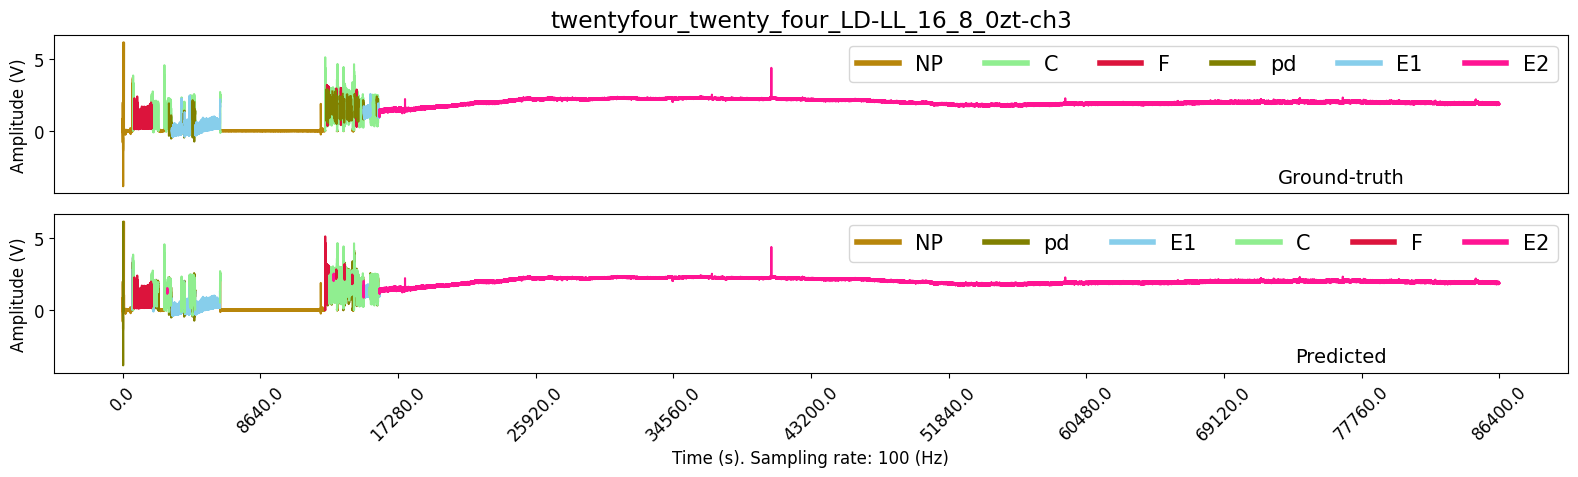

In [19]:
# plot 
epgs.plot_segmentation(which = 'pred_vs_gt', name = 'twentyfour_twenty_four_LD-LL_16_8_0zt-ch3', savefig = False)

In [23]:
# save analysis file 
epgs.save_analysis()

Analysis saved to ./prediction/ANA/Untitled_2.ANA


In [31]:
# Locate the recording manually
pred_ana = epgs.segment('Soybean.test_SBA-Rag5_6-10-2016-ch8', data_path = 'C:\\Dung\\EPG_project\\data_test', dataset_name = 'Soybean.test')
print('Overlap rate:',epgs.overlap_rate)

File name: Soybean.test_SBA-Rag5_6-10-2016-ch8
Overlap rate: 36.74


# EPGSegmentML

Support XGB, RF, LogReg, SVC

In [21]:
# Lets try another dataset
from DiscoEPG.utils import process_config

config = process_config('C:\\Dung\\EPG_project\\ML4Insects\\configs\\XGB.soybeanAphid.wavelet.json')
config 

{'exp_name': 'Soybean_Aphid',
 'dataset_name': 'soybeanAphid',
 'window_size': 1024,
 'hop_length': 1024,
 'arch': 'XGB',
 'method': 'wavelet',
 'scale': True,
 'outlier_filter': False,
 'scope': 1,
 'root_dir': 'C:\\Dung\\EPG_project\\ML4Insects',
 'data_path': 'C:\\Dung\\EPG_project\\data',
 'device': 'cuda',
 'timestamp': '2024-09-17 09:44:01'}

In [22]:
from DiscoEPG import EPGSegmentML

In [23]:
# Call the trainer
epg = EPGSegmentML(config)

Loading data ...


soybeanAphid: 100%|██████████| 32/32 [00:23<00:00,  1.36it/s]

Done! Elapsed: 23.49266039999202 s


In [24]:
# Generate training data by calculating features from the EPG signal
# If your data existed, a dialoug boxes might pop-up and ask if you want to still continue
# Feature calculation may takes a long time (About 10 minutes for 32 recordings)
# After that, the features Nmatrix will be saved so that you will not have to calculate it again
epg.generate_train_data()
# In this case, I skip the calculation because i have already done it

Warning. Training data existed.


In [25]:
# After calculating the features, you simply load it with this funciton
epg.load_train_data()


Data loaded from C:\Dung\EPG_project\data/dataML


In [26]:
# After loading this, your data will be saved as attribute of the class epg.X_train, epg.X_test, epg.y_train, epg.y_test
# Lets see some of these
epg.X_train.head(5)

,n5_0,n25_0,n75_0,n95_0,median_0,mean_0,std_0,var_0,rms_0,sk_0,...,n95_3,median_3,mean_3,std_3,var_3,rms_3,sk_3,zcr_3,en_3,perm_en_3
0,1.634853,1.884532,2.187798,2.233273,1.999246,1.997065,0.200095,0.040038,2.007064,-0.434418,...,0.002067,0.000014,0.000048,0.001414,0.000002,0.001415,1.296596,0.638835,185.000284,2.553911
1,0.539979,0.542393,0.545750,0.548402,0.544088,0.544102,0.002519,0.000006,0.544108,0.134964,...,0.001949,0.000082,-0.000008,0.001192,0.000001,0.001192,0.117872,0.514563,169.455526,2.584188
2,1.473986,1.505288,1.587266,1.630684,1.543597,1.548186,0.050704,0.002571,1.549016,0.262645,...,0.014388,0.000056,-0.000165,0.008315,0.000069,0.008317,0.281811,0.718447,169.679808,2.528863
3,0.521290,0.563900,0.695111,0.733800,0.658540,0.638700,0.075284,0.005668,0.643121,-0.193253,...,0.001877,-0.000044,-0.000032,0.001519,0.000002,0.001519,1.477717,0.650485,185.608090,2.560881
4,1.367590,1.376407,1.405293,1.480754,1.383378,1.399147,0.037319,0.001393,1.399644,1.572344,...,0.001695,0.000017,0.000004,0.001405,0.000002,0.001405,1.137302,0.553398,183.950813,2.578508


In [27]:
# After loading this, your data will be saved as attribute of the class epg.X_train, epg.X_test, epg.y_train, epg.y_test
# Lets see some of these
epg.y_train.head(5)

,0
0,6
1,0
2,5
3,6
4,3


In [28]:
# Training
# The training is simple as the data is already loaded, you simply run this function
epg.fit()

Training...
Finished training. Elapsed time: 19.37 (s)


In [29]:
# Task 1 evaluation
# You need to input your test data here.
pred = epg.predict(epg.X_test, epg.y_test)

Predicting ...
Accuracy: 95.25, f1: 91.65
Finished testing.


In [32]:
# Task 2 evaluation (segmentation)
# Lets test the segmentation ability
epg.inference_mode() # Switching to inference mode to read data from external source
pred_ana = epg.segment('Soybean.test_SBA-Rag5_6-10-2016-ch8', data_path = 'C:\\Dung\\EPG_project\\data_test', dataset_name = 'Soybean.test')
epg.save_analysis()

Generating segmentation ...
File name: Soybean.test_SBA-Rag5_6-10-2016-ch8


100%|██████████| 2812/2812 [00:21<00:00, 133.52it/s]


Overlap rate: 89.65
Analysis saved to C:\Dung\EPG_project\ML4Insects/prediction/ANA/Untitled_7.ANA.


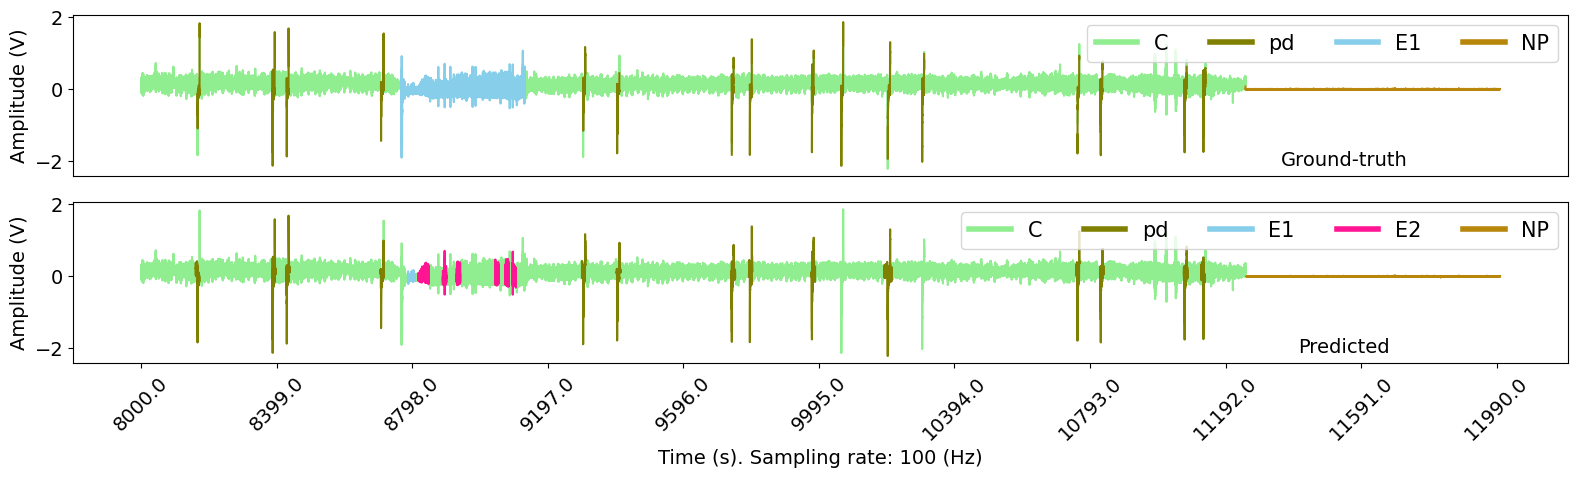

In [33]:
epg.plot_segmentation(which = 'pred_vs_gt', range = (8000,12000)) 
# similar to EPGSegment, you have some options for this plot: by hour or a specified range